# Forecasting Time Series Data Using Facebook's Prophet Library

**Prophet's web [site](https://facebookincubator.github.io/prophet/)**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from fbprophet import Prophet
from datetime import datetime

**Read data from the clipboard (or from csv, from database, etc) and create a Pandas dataframe:**

In [71]:
df = pd.read_csv('/home/pybokeh/Dropbox/data_sets/sales_data.csv', parse_dates=[0])

In [72]:
df.head()

,Date,Sales
0,2011-01-01,1664.81
1,2011-02-01,2397.53
2,2011-03-01,2840.71
3,2011-04-01,3547.29
4,2011-05-01,3752.96


Per documentation, we must have 2 columns: ```ds``` and ```y```

In [73]:
columns = ['ds','y']
df.columns = columns
df

,ds,y
0,2011-01-01,1664.81
1,2011-02-01,2397.53
2,2011-03-01,2840.71
3,2011-04-01,3547.29
4,2011-05-01,3752.96
5,2011-06-01,3714.74
6,2011-07-01,4349.61
7,2011-08-01,3566.34
8,2011-09-01,5021.82
9,2011-10-01,6423.48


Column ```ds``` must also be of ```datetime``` type.  Let's double-check:

In [74]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

### Let's plot the current trend

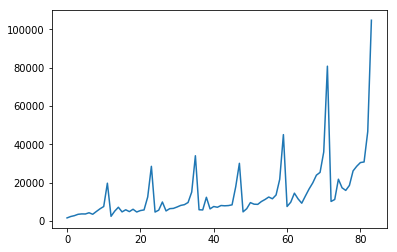

In [75]:
df['y'].plot()
plt.show()

### Let's use statsmodels' new seasonal_decompose() function:

It requires that we have a Series object with date/datetime index.

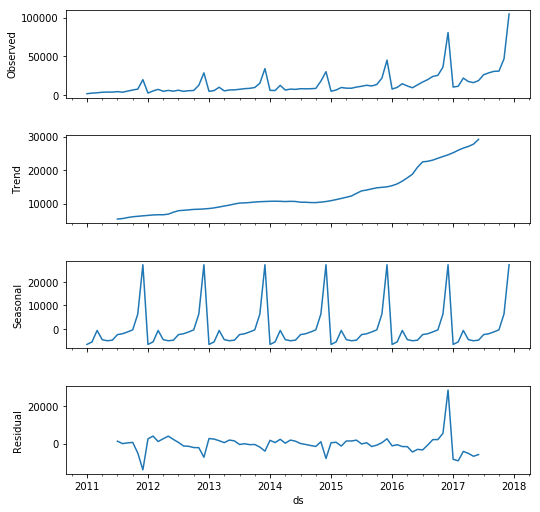

In [76]:
import statsmodels.tsa.api as smt
df2 = df.set_index('ds')
fig = smt.seasonal_decompose(df2.y).plot()
fig.set_size_inches(8,8)
plt.show()

### Based on the peaks increasing with each season/cycle, this appears to be a multiplicative trend.

Prophet is based on additive model, so we must convert our multiplicative data to additive by taking the log of the values:

In [77]:
df['y'] = np.log(df['y'])
df.tail()

,ds,y
79,2017-08-01,10.260691
80,2017-09-01,10.325659
81,2017-10-01,10.335962
82,2017-11-01,10.750093
83,2017-12-01,11.558479


In [78]:
df.head()

,ds,y
0,2011-01-01,7.417466
1,2011-02-01,7.782194
2,2011-03-01,7.951809
3,2011-04-01,8.173939
4,2011-05-01,8.230300


### Now fit the data using Prophet

In [ ]:
m = Prophet()
m.fit(df);

### Tell Prophet to give us forecasts of 24 months into the future

In [80]:
future_periods = 24
future = m.make_future_dataframe(periods=future_periods, freq='M')
future.tail(future_periods)

,ds
84,2017-12-31
85,2018-01-31
86,2018-02-28
87,2018-03-31
88,2018-04-30
89,2018-05-31
90,2018-06-30
91,2018-07-31
92,2018-08-31
93,2018-09-30


### Make prediction with upper and lower bounds:

Need to apply exponent/anti-Log function since we took the log of our data:

In [81]:
forecast = m.predict(future)
np.exp(forecast[['yhat', 'yhat_lower', 'yhat_upper']]).tail(future_periods)

,yhat,yhat_lower,yhat_upper
84,14825.844678,12683.396727,17428.621052
85,28329.764742,23920.332045,33338.673628
86,24336.693096,20667.431673,28459.866719
87,28642.395166,24465.450455,33849.918128
88,30624.297515,25903.043483,35960.110125
89,30996.431232,26415.756566,36526.604477
90,32640.989124,27931.113497,38246.135766
91,33288.176397,27931.099015,38657.221486
92,38222.800422,32171.374998,45404.380375
93,54424.454389,46063.484839,64193.820371


In [66]:
forecast = m.predict(future)
forecast[['yhat', 'yhat_lower', 'yhat_upper']].tail(future_periods)

,yhat,yhat_lower,yhat_upper
84,33264.089257,26305.797837,41127.871419
85,34407.926793,26815.639064,41960.440807
86,32775.687436,24848.079192,40271.115514
87,31164.847230,23899.156473,38949.323205
88,31723.889689,24467.851541,39163.391183
89,32899.122415,24834.104018,40868.067143
90,35326.738303,27546.101291,43066.759110
91,38109.032413,29549.018685,45457.317333
92,40254.333371,32258.845267,47952.204550
93,44736.648504,36959.622925,52456.389477


### To send forecast to clipboard:

In [17]:
np.exp(forecast[['yhat', 'yhat_lower', 'yhat_upper']]).tail(future_periods).to_clipboard()

### Make plot of prediction

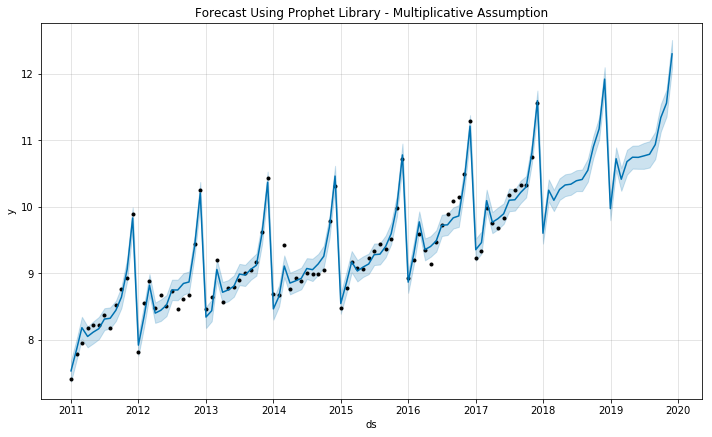

In [82]:
fig, axis = plt.subplots(figsize=(10, 6))
m.plot(forecast, ax=axis)
plt.title('Forecast Using Prophet Library - Multiplicative Assumption')
plt.show()